# K-Means Clustering

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics.

It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. 

For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. 



<h4>Table of contents</h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">K-Means with Python</a></li>
        <li><a href="#ref2">K-Means with Pyspark</a></li>
    </ol>
</div>
<br>

<a id="ref1"></a>
### K-Means Clustering with Python

In [174]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [164]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [165]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [168]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [170]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)

We assign the labels to each row in dataframe.

In [171]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [172]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, lets look at the distribution of customers based on their age and income:

C:\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


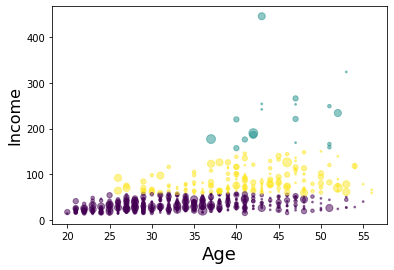

In [173]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.

<a id="ref2"></a>
### K-Means Clustering with Pyspark

First thing to do is start a Spark Session

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('customers').getOrCreate()

In [3]:
from pyspark.ml.clustering import KMeans
# Loads data.
dataset = spark.read.csv("Cust_Segmentation.csv",header=True,inferSchema=True)

In [4]:
dataset.head(1)

[Row(Customer Id=1, Age=41, Edu=2, Years Employed=6, Income=19, Card Debt=0.124, Other Debt=1.073, Defaulted=0, Address='NBA001', DebtIncomeRatio=6.3)]

In [5]:
#dataset.describe().show(1)

In [6]:
dataset.printSchema()

root
 |-- Customer Id: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Edu: integer (nullable = true)
 |-- Years Employed: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Card Debt: double (nullable = true)
 |-- Other Debt: double (nullable = true)
 |-- Defaulted: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- DebtIncomeRatio: double (nullable = true)



As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [7]:
columns_to_drop = ['Address']
dataset = dataset.drop(*columns_to_drop)
dataset.printSchema()

root
 |-- Customer Id: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Edu: integer (nullable = true)
 |-- Years Employed: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Card Debt: double (nullable = true)
 |-- Other Debt: double (nullable = true)
 |-- Defaulted: integer (nullable = true)
 |-- DebtIncomeRatio: double (nullable = true)



In [8]:
dataset.columns

['Customer Id',
 'Age',
 'Edu',
 'Years Employed',
 'Income',
 'Card Debt',
 'Other Debt',
 'Defaulted',
 'DebtIncomeRatio']

In [11]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [106]:
from pyspark.sql.types import IntegerType
dataset = dataset.withColumn("Defaulted", dataset["Defaulted"].cast(IntegerType()))

In [107]:
dataset.printSchema()

root
 |-- Customer Id: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Edu: integer (nullable = true)
 |-- Years Employed: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Card Debt: double (nullable = true)
 |-- Other Debt: double (nullable = true)
 |-- Defaulted: integer (nullable = true)
 |-- DebtIncomeRatio: double (nullable = true)



In [115]:
feat_cols = [
 'Age',
 'Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']

In [116]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')

In [117]:
final_data = vec_assembler.transform(dataset)

In [118]:
from pyspark.ml.feature import StandardScaler

In [119]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [120]:
final_data

DataFrame[Customer Id: int, Age: int, Edu: int, Years Employed: int, Income: int, Card Debt: double, Other Debt: double, Defaulted: int, DebtIncomeRatio: double, features: vector]

In [121]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [122]:
# Normalize each feature to have unit standard deviation.
cluster_final_data = scalerModel.transform(final_data)

## Train the Model and Evaluate

** Time to find out whether its 2 or 3! **

In [156]:
# Trains a k-means model.
kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)

In [157]:
model3 = kmeans3.fit(cluster_final_data)
model2 = kmeans2.fit(cluster_final_data)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [158]:
# Make predictions
predictions3 = model3.transform(cluster_final_data)
predictions2 = model2.transform(cluster_final_data)

In [159]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [160]:
silhouette = evaluator.evaluate(predictions3)
print("With k=3 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions2)
print("With k=2 Silhouette with squared euclidean distance = " + str(silhouette))

With k=3 Silhouette with squared euclidean distance = 0.05288868077858952
With k=2 Silhouette with squared euclidean distance = 0.6581986063262965


In [ ]:
#Show the results

In [155]:
centers=model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

Cluster Centers:
[5.38544237 2.08381863 2.54750121 2.6356673  1.9964595  2.30786829
 2.04421758]
[3.71924395 2.29195271 0.55736835 0.78361889 0.68066746 0.87084406
 2.18192288]
[4.38305208 1.49522293 1.24517269 0.97828653 0.34932727 0.44759616
 0.93527274]


In [149]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.

In [161]:
for k in range(2,9):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    predictions = model.transform(cluster_final_data)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("With K={}".format(k))
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print('--'*30)

With K=2
Silhouette with squared euclidean distance = 0.6581986063262965
------------------------------------------------------------
With K=3
Silhouette with squared euclidean distance = 0.05288868077858952
------------------------------------------------------------
With K=4
Silhouette with squared euclidean distance = 0.23934815694787387
------------------------------------------------------------
With K=5
Silhouette with squared euclidean distance = 0.09503424227629984
------------------------------------------------------------
With K=6
Silhouette with squared euclidean distance = 0.03747870420927804
------------------------------------------------------------
With K=7
Silhouette with squared euclidean distance = 0.07544170107415611
------------------------------------------------------------
With K=8
Silhouette with squared euclidean distance = 0.07633841797382555
------------------------------------------------------------


**Let's check with the transform and prediction columns that result form this! Congratulations if you made this connection, it was quite tricky given what we've covered!**

In [162]:
model3.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  261|
|         2|  439|
|         0|  150|
+----------+-----+



In [163]:
model2.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  183|
|         0|  667|
+----------+-----+

